In [ ]:
P_D = 0.01
P_T_given_D = 0.9
P_T_given_not_D = 0.05
P_not_D = 1 - P_D



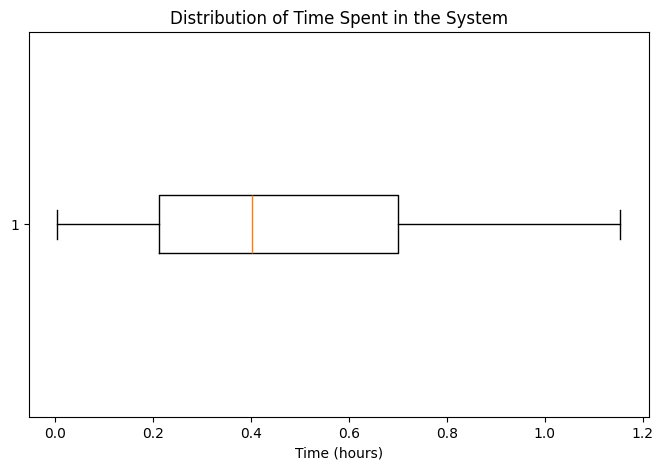

0.46816237654687065
3.1620379318259877


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
num_customers = 100  # Number of customers to simulate
arrival_rate = 8     # Calls per hour (lambda for arrival)
service_rate = 10    # Calls per hour (lambda for service)

# Seed for reproducibility
np.random.seed(42)

# Generate inter-arrival and service times using exponential distribution
inter_arrival_times = np.random.exponential(1 / arrival_rate, num_customers)
service_times = np.random.exponential(1 / service_rate, num_customers)

# Calculate arrival times and service start/completion times
arrival_times = np.cumsum(inter_arrival_times)
service_start_times = np.zeros(num_customers)
service_end_times = np.zeros(num_customers)

for i in range(num_customers):
    if i == 0:
        service_start_times[i] = arrival_times[i]
    else:
        # Service starts when the agent is free or when the customer arrives, whichever is later
        service_start_times[i] = max(arrival_times[i], service_end_times[i-1])
    service_end_times[i] = service_start_times[i] + service_times[i]

# Calculate time spent in the system (waiting + service)
time_in_system = service_end_times - arrival_times

# Calculate average time spent in the system
avg_time_in_system = np.mean(time_in_system)

# Find the time of maximum congestion (most customers in the system)
time_points = np.sort(np.concatenate((arrival_times, service_end_times)))
congestion = [np.sum((arrival_times <= t) & (service_end_times > t)) for t in time_points]
max_congestion_time = time_points[np.argmax(congestion)]

# Plotting box plot of time spent in the system
plt.figure(figsize=(8, 5))
plt.boxplot(time_in_system, vert=False)
plt.title("Distribution of Time Spent in the System")
plt.xlabel("Time (hours)")
plt.show()

print(avg_time_in_system)
print(max_congestion_time)


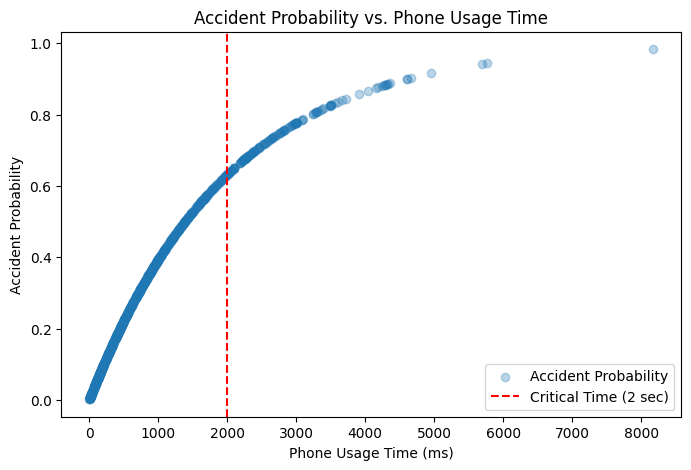

np.float64(0.323)

In [ ]:
# Simulation parameters
num_drivers = 1000  # Number of drivers to simulate
lambda_param = 0.5   # Rate parameter for accident probability function
critical_time = 2000 # Critical time in milliseconds (2 seconds)

# Seed for reproducibility
np.random.seed(42)

# Step 1: Generate random phone usage times (exponentially distributed)
phone_usage_times = np.random.exponential(scale=1000, size=num_drivers)  # Scale in milliseconds

# Step 2: Calculate probability of an accident for each distraction time
accident_probabilities = 1 - np.exp(-lambda_param * (phone_usage_times / 1000))

# Step 3: Simulate accidents using calculated probabilities (Bernoulli trials)
accidents = np.random.binomial(1, accident_probabilities)

# Step 4: Calculate the overall accident rate
accident_rate = np.mean(accidents)

# Step 5: Visualize accident probability vs. distraction time
plt.figure(figsize=(8, 5))
plt.scatter(phone_usage_times, accident_probabilities, alpha=0.3, label="Accident Probability")
plt.axvline(x=critical_time, color='red', linestyle='--', label="Critical Time (2 sec)")
plt.title("Accident Probability vs. Phone Usage Time")
plt.xlabel("Phone Usage Time (ms)")
plt.ylabel("Accident Probability")
plt.legend()
plt.show()

accident_rate


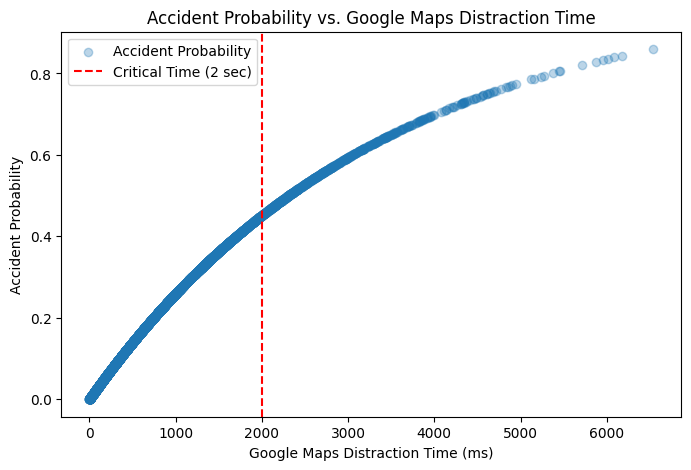

np.float64(0.1889)

In [ ]:
# Simulation parameters for Google Maps distraction
num_drivers = 10000  # Number of drivers to simulate
lambda_param = 0.3   # Lower risk factor compared to texting
critical_time = 2000 # Critical time in milliseconds (2 seconds)

# Seed for reproducibility
np.random.seed(42)

# Step 1: Generate random Google Maps distraction times (exponentially distributed)
maps_distraction_times = np.random.exponential(scale=800, size=num_drivers)  # Scale in milliseconds

# Step 2: Calculate probability of an accident for each distraction time
accident_probabilities_maps = 1 - np.exp(-lambda_param * (maps_distraction_times / 1000))

# Step 3: Simulate accidents using calculated probabilities (Bernoulli trials)
accidents_maps = np.random.binomial(1, accident_probabilities_maps)

# Step 4: Calculate the overall accident rate
accident_rate_maps = np.mean(accidents_maps)

# Step 5: Visualize accident probability vs. distraction time for Google Maps usage
plt.figure(figsize=(8, 5))
plt.scatter(maps_distraction_times, accident_probabilities_maps, alpha=0.3, label="Accident Probability")
plt.axvline(x=critical_time, color='red', linestyle='--', label="Critical Time (2 sec)")
plt.title("Accident Probability vs. Google Maps Distraction Time")
plt.xlabel("Google Maps Distraction Time (ms)")
plt.ylabel("Accident Probability")
plt.legend()
plt.show()

accident_rate_maps
